# Generatori di numeri pseudocasuali - ```nrand48```

Esistono diversi generatori di numeri pseudocasuali basati su algoritmi che producono sequenze numeriche.

Gli algoritmi hanno diversi livelli di complessità, ma alcune caratteristiche simili:
* dipendono da un valore iniziale (*seed*)
* è *difficile* prevedere la sequenza di numeri successivi ad un valore dato

In seguito formalizzeremo meglio le proprietà dei numeri pseudo casuali, che dovranno essere:
* tutti i numeri della sequenza dovranno avere la stessa *distribuzione di probabilità*
* ciascun numero dovrà essere *indipendente* dai precedenti

In letteratura, queste variabili di definiscono: *indipendenti e identicamente distribuite* (iid).

Nel seguito del corso sarà più chiaro cosa significa:
* indipendenti
* distribuite secondo una certa funzione

Per ora tralasciamo questi aspetti che approfondiremo dopo.

In genere, si preferisce partire da algoritmi che generino distribuzioni **uniformi**, e poi ottenere le distribuzioni che seguono diverse distribuzioni a partire da questi ultimi.

Qui implementiamo un algoritmo usato dalla funzione ```nrand48```.

La funzione è uno standard del sistema operativo Linux. Può essere usata in programmi nel linguaggio C e la sua <a href="https://linux.die.net/man/3/nrand48">documentazione</a> si trova online.

## La nostra implementazione di ```nrand48```
Nota: l'operatore ```%``` calcola il modulo, ossia il resto, di una divisione tra interi.
Il valore massimo ```max_rnd``` è uguale a $2^{48}$.

In [1]:
max_rnd = 0x1000000000000
def rand48(x, a = 0x5DEECE66D, c = 0xB, m=max_rnd):
    return (a*x + c) % m

Per passare da un numero intero ad un numero reale (approssimato come *floating point*) basta dividere per il valore massimo.

In [2]:
x = 123
for i in range(20):
    x = rand48(x)
    print('{0:15d}'.format(x), '{:14.12f}'.format(x/max_rnd))

  3101433181802 0.011018504089
256148600186669 0.910022635689
 52824481913908 0.187670259471
180709508938287 0.642009144294
 61367007330318 0.218019406369
182282737146369 0.647598373669
245404777363576 0.871852909383
235977241942819 0.838359575336
278897684004850 0.990843616950
 45660457969173 0.162218533607
131344037942524 0.466627760227
 38339246741335 0.136208366333
217948796869142 0.774309671915
 96646384689001 0.343356932891
 24814839477696 0.088160019650
221447066641099 0.786738022786
113019647849082 0.401526448887
228296491031037 0.811072066508
215301719039684 0.764905362302
  8893668700543 0.031596658447


In [3]:
import matplotlib.pyplot as plt

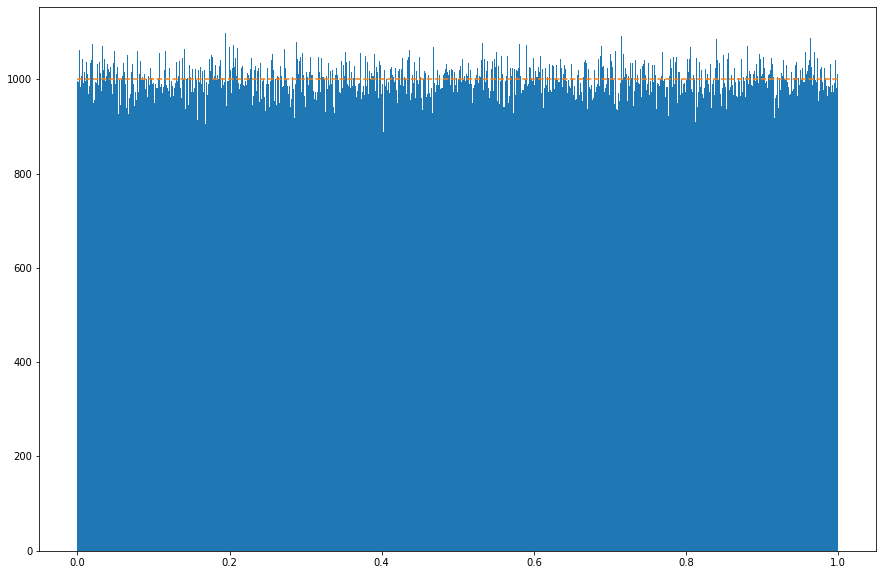

In [4]:
seq = []
x = 123
num = 1000000
for i in range(num):
    x = rand48(x)
    seq.append(x/max_rnd)
nbins = 1000
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, patches = ax.hist(seq, nbins)
y = [float(num)/nbins]*(nbins+1)
ax.plot(bins, y, '--')
plt.show()

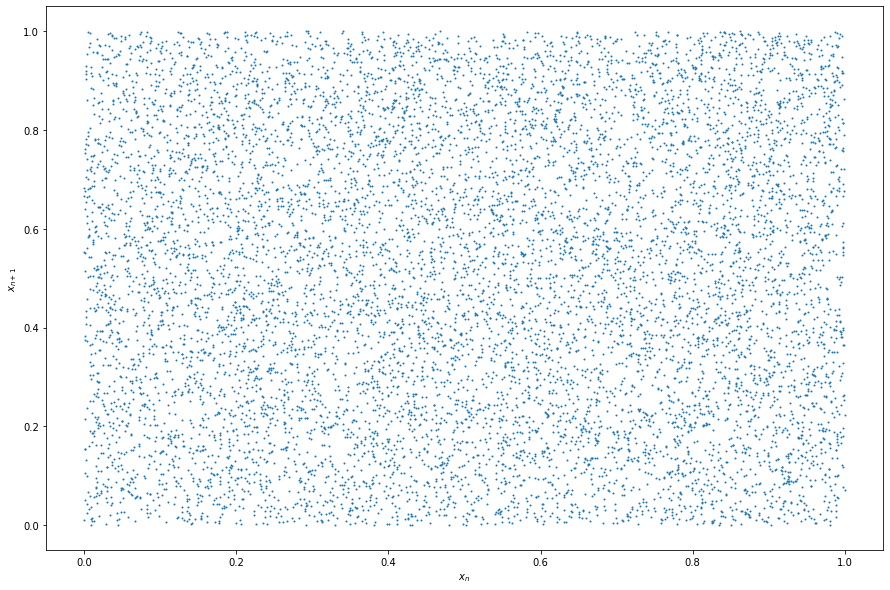

In [5]:
def plot2d(a=0x5DEECE66D, c=0xB):
    px = []
    py = []
    x = 123
    num = 10000
    for i in range(num):
        px.append(x/max_rnd)
        x = rand48(x, a, c)
        py.append(x/max_rnd)
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlabel(r'$x_{n}$')
    ax.set_ylabel(r'$x_{n+1}$')
    ax.plot(px, py, marker=".", markersize=2, linestyle='')
plot2d()

Per valori piccoli dei parametri la sequenza diventa periodica, quindi poco utile.

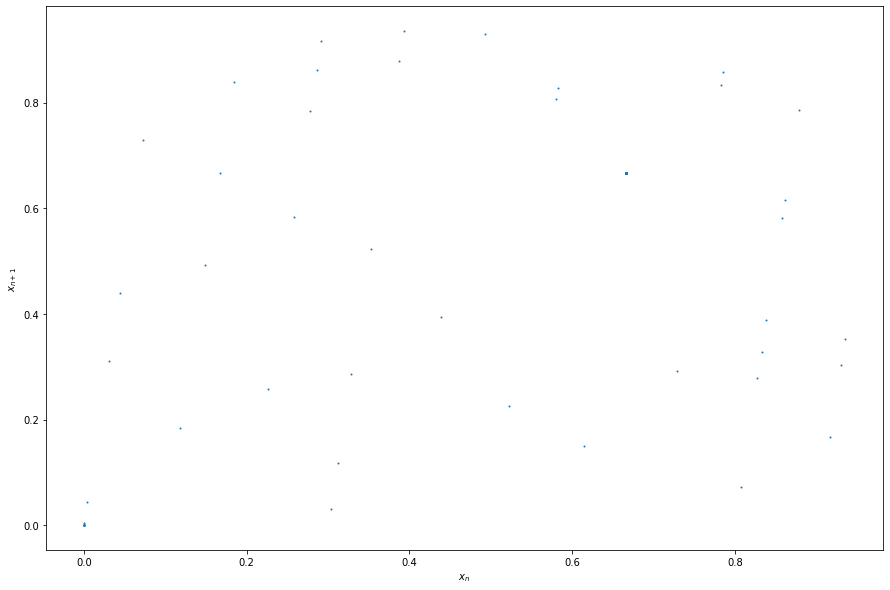

In [6]:
plot2d(a=10,c=6)

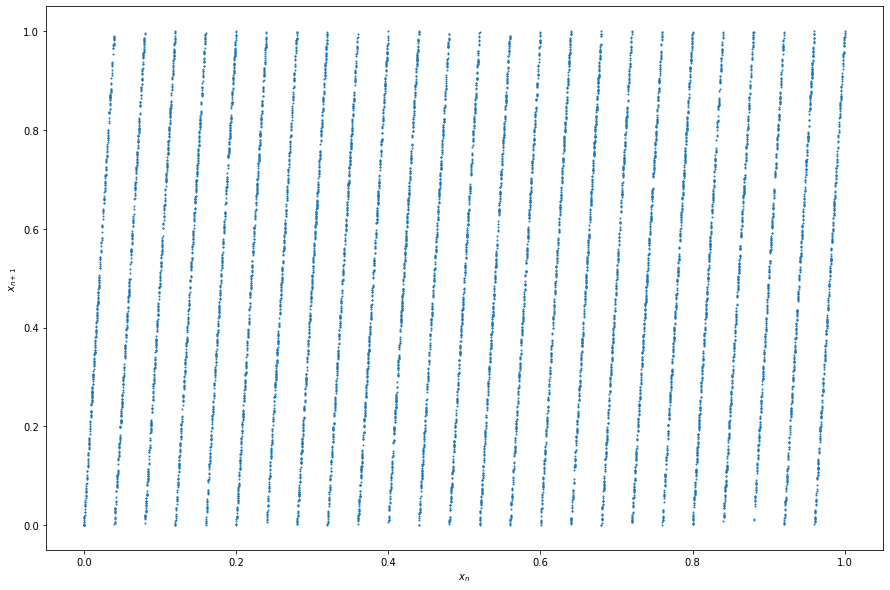

In [7]:
plot2d(a=25,c=3)

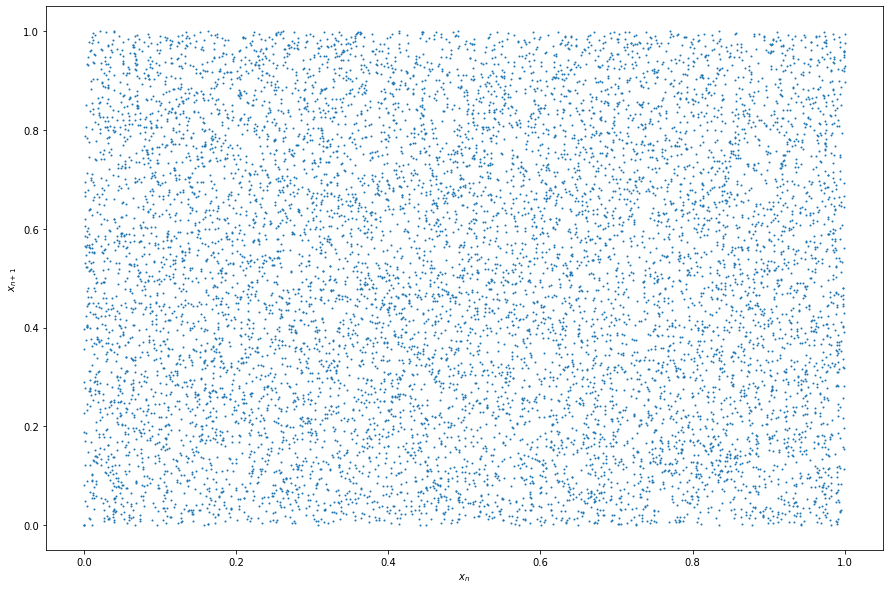

In [8]:
plot2d(a=657,c=31)

Rispetto alla mappa logistica $x_{n+1}=rx_n(1-x_n)$, la non linearità è ottenuta dall'operatore *modulo* che riporta il valore $ax_n+c$ entro i limiti di macchina con la quale può essere rappresentato un numero intero.

Si risparmia quindi una moltiplicazione, e non è necessario scartare i primi numeri casuali estratti, rendendo più efficiente l'algoritmo.

Ma il risultato di questo algoritmo è decisametne più monotono della mappa logistica.